In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [2]:
Datos=pd.read_excel('DatosTarea6.xlsx')
Datos.head()

,ELEKTRA,GMODELO C,KIMBER A,KOF L,GOOG,M_BONOS_171214,S_UDIBONO_251204,ORO,EURO
2011-01-04,-0.005366,-0.020709,0.003607,-0.001193,-0.002963,0.002348,0.004840,-0.021782,0.001116
2011-01-05,-0.002957,-0.003605,0.000000,0.002186,0.002403,-0.006856,-0.005311,-0.010842,-0.015430
2011-01-06,-0.001013,0.000134,-0.000667,0.009584,0.010390,0.001265,-0.000798,-0.001705,-0.008379
2011-01-07,-0.003790,0.008788,-0.009519,-0.001082,0.006628,0.002345,0.002581,0.000559,-0.009199
2011-01-10,-0.002764,0.001987,-0.010972,-0.004143,-0.000799,-0.000178,-0.002297,0.004764,-0.003458


In [27]:
Columnas=Datos.columns
def matrix_std(lista,Data):
    """
     Calcula la matriz de desviaciones estandar(riesgo del portafolio)
        
    Parametro:
     -------
    lista:list
        Lista  que contiene el nombre de las columnas del Dataframe
    Data:DataFrame
        Contiene los datos de 
    
    Retuns:
      -----
      list:
         Matriz con las desviaciones etandar del portafolio 
         
    """
    filas=[i for i in range(len(lista))]
    columnas=filas
    def std(fila):
        n=len(Data[lista[fila]])
        if fila!=5 and fila!=6:
             return (sqrt(sum((x-Data[Columnas[fila]].mean())**2 for x in Data[Columnas[fila]]))/sqrt(n))*sqrt(252)
        else:
             return (sqrt(sum((x-Datos[Columnas[fila]].mean())**2 for x in Data[Columnas[fila]]))/sqrt(n))*sqrt(360)
    matrix=[round(std(fila),6) if fila==columna else 0 for fila in filas for columna in columnas ]
    return [matrix[i:i+len(lista)] for i in range(0,len(matrix),len(lista))]

def ver_data(Lista,indices=Columnas):
    """
     Regresa la visualización de los datos de un np.array
    
    Parametros:
     -------
    Lista:list
        Lista  que contiene los datos de la tabla o matriz
    
    Retuns:
      -----
      Dataframe:
          Dataframe donde se  en una tabla los datos
    """
    return pd.DataFrame({i+1:pd.Series(Lista[i],index=indices) for i in range(len(Lista))})
def volatidades(Matriz_Pesos):
    """
     Regresa la matriz de la volatidad para diferentes portafolios
    
    Parametros:
     -------
     Matri_Pesos: list
       Lista con los pesos del portafolio
    
    Retuns:
      -----
      ndarray
    """
    return [sqrt(Matriz_Pesos[i,:-2].T@MVC@Matriz_Pesos[i,:-2]) for i in range(len(Matriz_Pesos))]


In [4]:
# Matriz de riesgo del portafolio
sigma=matrix_std(Columnas,Datos);sigma

[[0.508802, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.273779, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0.234345, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0.244054, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.308077, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.051193, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.099947, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.20745, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.119609]]

In [5]:
Lista_Datos=[Datos[columna] for columna in Columnas]
sigma=np.array(sigma)
matρ=np.corrcoef(Lista_Datos)#np.corrcoef(Datos)
ver_data(matρ)

,1,2,3,4,5,6,7,8,9
ELEKTRA,1.000000,0.178459,0.261077,0.079983,0.057326,0.013190,0.102355,-0.145366,-0.113353
GMODELO C,0.178459,1.000000,0.202868,0.248900,0.072715,0.016604,0.034245,-0.077614,-0.106783
KIMBER A,0.261077,0.202868,1.000000,0.227514,0.038070,0.040851,-0.016654,-0.126229,-0.166021
KOF L,0.079983,0.248900,0.227514,1.000000,0.093153,0.116748,0.021857,-0.040049,-0.103249
GOOG,0.057326,0.072715,0.038070,0.093153,1.000000,-0.162544,-0.121418,0.175762,0.344447
M_BONOS_171214,0.013190,0.016604,0.040851,0.116748,-0.162544,1.000000,0.700695,0.196246,-0.074040
S_UDIBONO_251204,0.102355,0.034245,-0.016654,0.021857,-0.121418,0.700695,1.000000,0.120427,-0.039311
ORO,-0.145366,-0.077614,-0.126229,-0.040049,0.175762,0.196246,0.120427,1.000000,0.292206
EURO,-0.113353,-0.106783,-0.166021,-0.103249,0.344447,-0.074040,-0.039311,0.292206,1.000000


In [8]:
RE=np.array([Datos[col].mean()*252 if (col!= 'M_BONOS_171214' and col!= 'S_UDIBONO_251204')
              else Datos[col].mean()*360  for col in Columnas])

In [22]:
MVC=sigma@matρ@sigma.T 
Lista=[]
for  fila  in MVC:
    Lista.append(np.append(fila,1))
Aumento=[1 for i in range(len(Lista[0])-1)]+[0]
Lista.append(np.array(Aumento))
MVCA=np.array(Lista)
# Haciendo el cálculo con la matriz de doble aumento
ListaAA=[]
for  fila,rendimiento  in zip(MVCA,np.append(RE,0)):
    ListaAA.append(np.append(fila,rendimiento))
Aumento2=list(RE)+[0]*2
ListaAA.append(np.array(Aumento2))
MVCAA=np.array(ListaAA)


In [49]:
#INVERSA MCVAAA
MVCAA_IN=np.linalg.inv(MVCAA)
def MATRIXw(R,n,i,op=1):
    """
     Regresa la matriz de los valores de Wi del portafolio
    
    Parametros:
     -------
    R:float 
        Valor en donde inician los rendientos
    n: int
     la longitud de las carteras
    i: float
        incrementos
    op: bool
       1 si R+=R*i
       0 si R+=i
    
    Retuns:
      -----
      ndarray
    """
    Vector=[]
    for x in range(n):
        Vector=Vector+[R]
        if op==1:
            R+=R*i
        else:
            R+=i
    Identidad=np.vstack([np.zeros([9,n]),np.ones([1,n]),np.array(Vector)])
    Pesos=MVCAA_IN@Identidad
    return (Pesos.T,np.array(Vector)) #0 Para los pesos y 1 para el valor de las esperanzas 
def front_efic(matrix):return np.where(matrix>0)
def front_mv(matrix):return np.where(matrix<=0)
def grafica_fronteras(a,b,c,d):
    """
     Regresa la grafica de las fronteras eficientes y de minima varianza
    Parametros:
     -------
    a:float 
        Valor en donde inician los rendientos
    b: int
     la longitud de las carteras
    c: float
        incrementos
    d: bool
       1 si R+=R*i
       0 si R+=i
    
    
    Retuns:
      -----
      NULL
    """
    IND_FRONT_EF=front_efic(MATRIXw(a,b,c,d)[1]) #Valores del Rendimiento para el portafolio
    IND_FRONT_MV=front_mv(MATRIXw(a,b,c,d)[1]) #Valores del Rendimiento para el portafolio
    X=np.array(volatidades(MATRIXw(a,b,c,d)[0])) #Valores de la volatilidad
    Y_F_EF=MATRIXw(a,b,c,d)[1][IND_FRONT_EF] #Parte superior de la parabola
    Y_F_MV=MATRIXw(a,b,c,d)[1][IND_FRONT_MV] #Parte inferior de la parabola
    plt.title('E(rp) vs σ')
    plt.plot(X[IND_FRONT_EF],Y_F_EF,label="Eficiente",color="green")
    plt.plot(X[IND_FRONT_MV],Y_F_MV,label="MinVar",color="deeppink")
    plt.legend(loc="lower left")
    plt.xlabel('Volatilidad')
    plt.ylabel('Rendimiento')
    
def plot_CAL(ERP,sp,i=0.042543):
    S=lambda Erp,sp:(Erp-i)/sp
    A=(sp,ERP)
    B=(0,i)
    m=(B[1]-A[1])/(B[0]-A[0])
    den=round(S(ERP,sp),4)
    vector=np.linspace(0,1,13)
    plt.plot(vector,[m*x+i for x in vector],label="CAL",color="darkblue",linewidth=2,linestyle="dashed")

In [31]:
MVC_inv=np.linalg.inv(MVC)
rf=0.0425432636986065
R_Exces=np.array(RE)-rf
V_vector=MVC_inv@R_Exces
W_tan=V_vector/V_vector.sum()
E_M=(W_tan*RE).sum()
Sig_M=sqrt(W_tan.T@MVC@W_tan)
ErpT=lambda sigp:rf+(E_M-rf)*sigp/Sig_M
sigmas=volatidades(MATRIXw(-2.50,241,0.02,0)[0])
Ren_Tan=list(map(ErpT,sigmas))


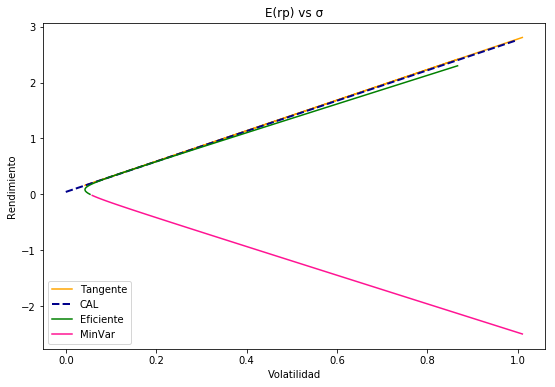

In [53]:
plt.plot(sigmas,Ren_Tan,label="Tangente",color="orange")
plot_CAL(MATRIXw(-2.50,241,0.02,0)[1][150],sigmas[150])
grafica_fronteras(-2.50,241,0.02,0)
plt.rcParams["figure.figsize"] =[9, 6]


**¿Qué es un mercado perfecto?**

Es el mercado en donde la oferta y la demanda actuan libremente, este mercado cumple con las carcateristicas de competencia perfecta


**¿Qué es un mercado eficiente?**

Es aquel en el que los precios de los activos que en él cotizan reflejan en todo momento la información disponible en el mercado.


**¿Qué es el equilibrio económico?**

Es un estado o condición que se da cuando las fuerzas que impulsan la economía se mantienen estables y no cambian. En esta situación, la oferta y la demanda se igualan.
 
**¿Qué es un modelo de regresión lineal simple?**

Es un  modelo matemático con la finalidad de  determinar la relación entre una variable dependiente, con respecto a la variable independiente. Su formula es:

$Y_{t}=\beta_{1}+\beta_{2}X_{t}+u_{t}$ Donde:

$\beta_{1},\beta_{2} \in R$

**Describa los principales elementos de una regresión lineal simple y cómo interpretar los resultados de una tabla ANOVA.**

La variable $Y_{t}$ es la variable dependiente

La variabel $X_{t}$ es la variable  independiente

$\beta_{1}$ es la pendiente se encuentra etre cero y uno

$\beta_{2}$ pertence a los reales

$u_{t}$ son los errores de la estimación que son variables normales estandarizadas



Valor F
Es el estadístico de prueba usado para determinar si el término está asociado con la respuesta.
Se utiliza para calcular el valor p, un valor F suficientemente grande indica que el término o el modelo es significativo.

Valor p
Mide la evidencia en contra de la hipótesis nula. Las probabilidades más bajas proporcionan una evidencia más fuerte en contra de la hipótesis nula. Su nivel de significancia es α

Valor p ≤ α: La asociación es estadísticamente significativa, se concluye que hay relación entre las hipotesís 

Valor p > α: La asociación no es estadísticamente significativa,no se puede conlcuir existe asociación estísticamente significativa

El intervalo de confianza se utiliza para evaluar la estimación de la media de la población para cada grupo.

La desviación estandar indica que tan dispersos estan los datos, a mayor desviación estandar implica mayor disperción.






Bibliografia:

M. (s. f.). Tabla de medias de ANOVA de un solo factor - Minitab. (C) Minitab, LLC. All rights Reserved. 2022. Recuperado 28 de febrero de 2022, de https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/all-statistics-and-graphs/means/

Sanjuán, F. J. M. (2021, 27 septiembre). Mercado eficiente. Economipedia. Recuperado 28 de febrero de 2022, de https://economipedia.com/definiciones/mercado-eficiente.html

Quiroa, M. (2021, 9 noviembre). Equilibrio económico. Economipedia. Recuperado 28 de febrero de 2022, de https://economipedia.com/definiciones/equilibrio-economico.html